# German Credit

In [465]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [466]:
#Reading the data

data = pd.read_csv('german_credit_data.csv')

In [289]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# Exploratory Data Analysis

In [467]:
#Removing the unnecessary column

data = data.drop(['Unnamed: 0'],axis = 1)

data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [79]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [80]:
#Checking for null values

data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [81]:
#Checking the dependant variable distribution : This shows that the dependant variable is imbalanced

data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

Analyzing the features with null values to fill them effectively

In [54]:
data['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [55]:
data['Checking account'].value_counts() 

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [468]:
#Encoding the target variable(for plotting purposes)

data['Risk'] = np.where(data['Risk'] == 'good',1,0)

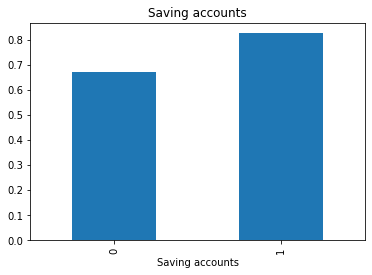

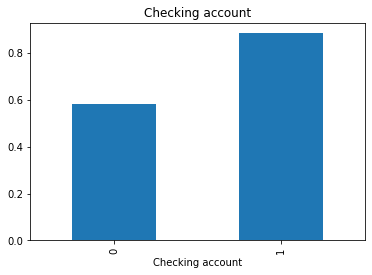

In [6]:
#Plot to see whether the null values have any significance towards the target

featureNa = [feature for feature in data.columns if data[feature].isnull().sum()>0]

for feature in featureNa:
    data_plot = data.copy()
    
    data_plot[feature] = np.where(data_plot[feature].isnull(), 1, 0)
    
    data_plot.groupby(feature)['Risk'].mean().plot.bar()
    plt.title(feature)
    plt.show()

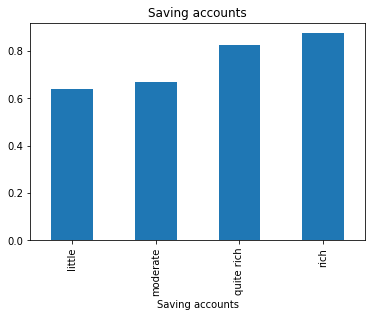

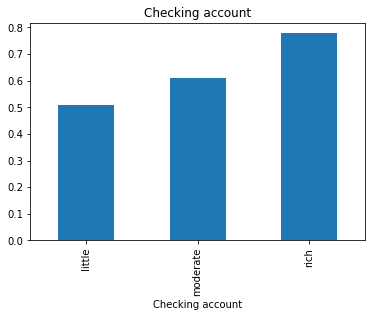

In [69]:
#Finding which category of missing feature has which target possiblity

for feature in featureNa:
    data.groupby(feature)['Risk'].mean().plot.bar()
    plt.title(feature)
    plt.show()

Break down of features into the base categories [Categorical,discrete,continuous]

In [413]:
categorical_columns = [feature for feature in data.columns if(data[feature].dtypes == 'O')]

for feature in categorical_columns:
    print("{} feature has {} categories".format(feature,len(data[feature].value_counts())))

Sex feature has 2 categories
Housing feature has 3 categories
Saving accounts feature has 6 categories
Checking account feature has 5 categories
Purpose feature has 8 categories


In [414]:
#Lets split the numerical feature further into discrete and continuous with a threshold of 20

discrete_columns = [feature for feature in data.columns if len(data[feature].unique()) < 20 
                                                                 and feature not in categorical_columns]

for feature in discrete_columns:
    print("{} feature has {} different data point values".format(feature,len(data[feature].value_counts())))

Job feature has 4 different data point values
Risk feature has 2 different data point values
Saving accountsNa feature has 2 different data point values
Checking accountNa feature has 2 different data point values


In [415]:
continuous_columns = [feature for feature in data.columns if feature not in discrete_columns+categorical_columns]


for feature in continuous_columns:
    print("{} feature has {} different data point values".format(feature,len(data[feature].value_counts())))

Age feature has 53 different data point values
Credit amount feature has 921 different data point values
Duration feature has 33 different data point values


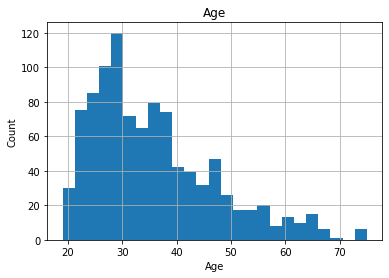

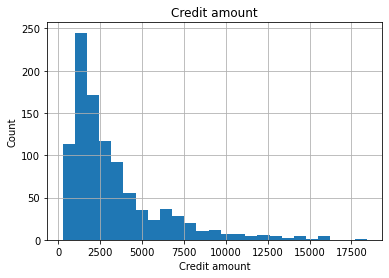

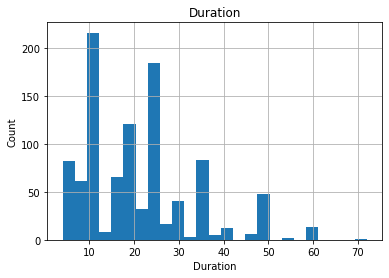

In [61]:
#Lets understand the distribution of continuous variable features in using histograms

for feature in continuous_columns:
    data_cont_plot=data.copy()
    data_cont_plot[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Feature Engineering

Since the null values showed some significance towards the target, I'm adding new features which denotes whether the root feature was null or not

In [469]:
for feature in featureNa:
    data[feature+'Na'] = np.where(data[feature].isnull(), 1, 0)
    data[feature] = np.where(data[feature].isnull(),1,data[feature])

In [470]:
data_saving_account = np.array(data['Saving accounts'])
data_risk = np.array(data['Risk'])
data_saving_account

array([1, 'little', 'little', 'little', 'little', 1, 'quite rich',
       'little', 'rich', 'little', 'little', 'little', 'little', 'little',
       'little', 'moderate', 1, 1, 'little', 'quite rich', 'little',
       'quite rich', 'little', 'moderate', 1, 'little', 'little', 'rich',
       'little', 'little', 'rich', 'little', 'moderate', 1, 'little',
       'little', 'little', 'little', 'little', 'little', 'quite rich',
       'quite rich', 'little', 'moderate', 'little', 'little',
       'quite rich', 'quite rich', 'little', 'moderate', 1, 'little',
       'little', 1, 'little', 1, 1, 'little', 'little', 'little',
       'little', 1, 'little', 'little', 'little', 1, 'little', 'rich',
       'little', 1, 'little', 1, 'little', 'little', 1, 'little',
       'little', 'little', 1, 'little', 1, 'quite rich', 'moderate',
       'little', 'little', 'little', 'little', 'moderate', 'moderate',
       'little', 'little', 'little', 1, 1, 'rich', 'little', 1,
       'moderate', 'little', 1, 'm

Filling the null values with new features corresponding to their relationship with the data

In [471]:
for i in range(len(data_saving_account)):
    if(data_saving_account[i] == 1):
        if(data_risk[i] == 1):
            data_saving_account[i] = 'little/moderate'
        else:
            data_saving_account[i] = 'quite rich/rich'
    
data['Saving accounts'] = data_saving_account

In [410]:
data['Saving accounts'].value_counts()

little             603
little/moderate    151
moderate           103
quite rich          63
rich                48
quite rich/rich     32
Name: Saving accounts, dtype: int64

In [472]:
data_Checking_account = np.array(data['Checking account'])

for i in range(len(data_saving_account)):
    if(data_Checking_account[i] == 1):
        if(data_risk[i] == 1):
            data_Checking_account[i] = 'little/lower moderate'
        else:
            data_Checking_account[i] = 'Higher moderate/rich'
    
data['Checking account'] = data_Checking_account

In [412]:
data['Checking account'].value_counts()

little/lower moderate    348
little                   274
moderate                 269
rich                      63
Higher moderate/rich      46
Name: Checking account, dtype: int64

In [350]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts       0
Checking account      0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
Saving accountsNa     0
Checking accountNa    0
dtype: int64

In [299]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Saving accountsNa',
       'Checking accountNa'],
      dtype='object')

Since Naive bayes algorithm works based on conditional probablity, lets try to make every feature categorized and encoded so that algorihm fits well hopefully

In [252]:
data.describe()

,Age,Job,Credit amount,Duration,Risk,Saving accountsNa,Checking accountNa
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.700000,0.18300,0.394000
std,11.375469,0.653614,2822.736876,12.058814,0.458487,0.38686,0.488879
min,19.000000,0.000000,250.000000,4.000000,0.000000,0.00000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000,0.00000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,1.000000,0.00000,0.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000,0.00000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000,1.00000,1.000000


In [473]:
data_age = np.array(data['Age'])
age_range = [i for i in range(int(np.min(data_age)),int(np.max(data_age))+1,int(np.std(data_age)))]
for i in range(len(data_age)):
    for j in range(len(age_range)):
        if data_age[i]==19:
            data_age[i]=str(str(19)+'_'+str(30))
        elif data_age[i]==75:
            data_age[i]=str(str(63)+'_'+str(74))
        elif data_age[i]<=age_range[j]:
            data_age[i] = str(age_range[j-1])+str(age_range[j])

P(A|B) = (P(B|A)*P(A))/P(B)

0 1
0  1
1

19 30 41 52 63 74

20

19_30

In [474]:
data_age = list(map(str,data_age))
data['Age'] = data_age
data['Age'].value_counts()

1930    411
3041    332
4152    161
5263     68
6374     28
Name: Age, dtype: int64

In [475]:
data_credit = np.array(data['Credit amount'])
credit_range = [i for i in range(int(np.min(data_credit)),int(np.max(data_credit))+1,int(np.std(data_credit)))]
for i in range(len(data_credit)):
    for j in range(len(credit_range)):
        if data_credit[i]==18424:
            data_credit[i]=str(str(250)+'_'+str(3071))
        elif data_credit[i]==250:
            data_credit[i]=str(str(14355)+'_'+str(17176))
        elif data_credit[i]<=credit_range[j]:
            data_credit[i] = str(credit_range[j-1])+str(credit_range[j])

In [476]:
data_credit = list(map(str,data_credit))
data['Credit amount'] = data_credit
data['Credit amount'].value_counts()

2503071       633
30715892      212
58928713       99
871311534      29
1153414355     18
1435517176      9
Name: Credit amount, dtype: int64

In [477]:
data_duration = np.array(data['Duration'])
duration_range = [i for i in range(int(np.min(data_duration)),int(np.max(data_duration))+1,int(np.std(data_duration)))]
for i in range(len(data_duration)):
    for j in range(len(duration_range)):
        if data_duration[i]==4:
            data_duration[i]=str(str(4)+'_'+str(16))
        elif data_duration[i]==72:
            data_duration[i]=str(str(52)+'_'+str(64))
        elif data_duration[i]<=duration_range[j]:
            data_duration[i] = str(duration_range[j-1])+str(duration_range[j])

In [478]:
data_duration = list(map(str,data_duration))
data['Duration'] = data_duration
data['Duration'].value_counts()

416     433
1628    354
2840    132
4052     65
5264     16
Name: Duration, dtype: int64

In [479]:
#Splitting the dependant and independant variables

y = data['Risk']
train = data.drop(['Risk'],axis=1)

In [480]:
#Function to encode categorical data

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],drop_first = True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode],axis = 1)
    return(res)

In [481]:
for feature in train.columns:  #categorical_columns
    train = encode_and_bind(train,feature)

In [482]:
train.columns

Index(['Age_3041', 'Age_4152', 'Age_5263', 'Age_6374', 'Sex_male',
       'Housing_own', 'Housing_rent', 'Saving accounts_little/moderate',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_quite rich/rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_little/lower moderate',
       'Checking account_moderate', 'Checking account_rich',
       'Credit amount_1435517176', 'Credit amount_2503071',
       'Credit amount_30715892', 'Credit amount_58928713',
       'Credit amount_871311534', 'Duration_2840', 'Duration_4052',
       'Duration_416', 'Duration_5264', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [483]:
train.columns

Index(['Age_3041', 'Age_4152', 'Age_5263', 'Age_6374', 'Sex_male',
       'Housing_own', 'Housing_rent', 'Saving accounts_little/moderate',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_quite rich/rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_little/lower moderate',
       'Checking account_moderate', 'Checking account_rich',
       'Credit amount_1435517176', 'Credit amount_2503071',
       'Credit amount_30715892', 'Credit amount_58928713',
       'Credit amount_871311534', 'Duration_2840', 'Duration_4052',
       'Duration_416', 'Duration_5264', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [484]:
train.shape

(1000, 32)

In [485]:
#Cell to split train_data into model train and test data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train,y,test_size = 0.10,random_state = 42)

# Model fit and evaluation

In [453]:
#Without categorization

from sklearn.naive_bayes import GaussianNB

gnb_usual = GaussianNB()
gnb_usual.fit(x_train, y_train)

GaussianNB()

In [454]:
gnb_usual.score(x_train,y_train),gnb_usual.score(x_test,y_test)

(0.73, 0.75)

In [464]:
from sklearn.metrics import confusion_matrix

y_pred = gnb_usual.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
tn,fp,fn,tp

(26, 3, 22, 49)

In [486]:
#With all features categorized

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [456]:
gnb.score(x_train,y_train),gnb.score(x_test,y_test)

(0.875, 0.86)


In [492]:
#from sklearn.metrics import confusion_matrix

y_pred = gnb.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
tn,fp,fn,tp

(29, 0, 15, 56)

0  1 0 1 0 0 0 1 1 1 0=bad

0  1 0 1 0 0 0 1 0 1 0=good